In [6]:
#Importing Libraries


import pandas as pd
import glob
import os
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#This code defines a function called read_zipfile that takes a single argument filepath.
#The function expects filepath to be a path to a zip file that contains several CSV files, and it reads the CSV files 
#inside the zip file using the pandas library.

#The function renames the columns of the CSV files to more descriptive names and joins the data frames using a left join 
#on their timestamps. The resulting data frame is returned.

#The code then defines a list of folders, and for each folder it finds all the zip files inside it using the glob library.
#It then applies the read_zipfile function to each zip file to get a list of data frames, and concatenates them using 
#pd.concat. The resulting data frame is stored in a variable called df.

#Finally, the code removes any rows where ibo1 column has the value of 99999.


def read_zipfile(filepath):
    with zipfile.ZipFile(filepath) as zf:
        zf.extractall()
        accelerometer = pd.read_csv('ACC.csv', index_col=None, header=0)
        blood_vol = pd.read_csv('BVP.csv', index_col=None, header=0)
        eda = pd.read_csv('EDA.csv', index_col=None, header=0)
        heart_rate = pd.read_csv('HR.csv', index_col=None, header=0)
        ibi = pd.read_csv('IBI.csv', index_col=None, header=0) if os.path.getsize('IBI.csv') > 0 else None
        temp = pd.read_csv('TEMP.csv', index_col=None, header=0)

        accelerometer = accelerometer.rename(columns={accelerometer.columns[0]: 'accelerometer_X', accelerometer.columns[1]: 'accelerometer_Y', accelerometer.columns[2]: 'accelerometer_Z'})
        blood_vol = blood_vol.rename(columns={blood_vol.columns[0]: 'blood_vol'})
        eda = eda.rename(columns={eda.columns[0]: 'eda'})
        heart_rate = heart_rate.rename(columns={heart_rate.columns[0]: 'heart_rate'})
        if ibi is not None:
            ibi = ibi.rename(columns={ibi.columns[0]: 'ibo1', ibi.columns[1]: 'ibo2'})
        
        temp = temp.rename(columns={temp.columns[0]: 'temp'})

        if ibi is not None:
            joined = accelerometer.join(blood_vol).join(eda).join(heart_rate).join(ibi).join(temp).dropna()
        else:
            joined = accelerometer.join(blood_vol).join(eda).join(heart_rate).dropna()
            joined['ibo1'] = 99999
            joined['ibo2'] = 99999
            joined = joined.join(temp)
        
        os.remove('ACC.csv')
        os.remove('BVP.csv')
        os.remove('EDA.csv')
        os.remove('HR.csv')
        if ibi is not None:
            os.remove('IBI.csv')
        os.remove('TEMP.csv')
        return joined

folders = glob.glob(os.path.join("Data", "*"))
files = [glob.glob(os.path.join(f, '*.zip')) for f in folders]
dfs = [read_zipfile(file) for sublist in files for file in sublist]
df = pd.concat(dfs, ignore_index=True, sort=False)
df = df[~(df['ibo1'] == 99999)]

In [8]:
df

,accelerometer_X,accelerometer_Y,accelerometer_Z,blood_vol,eda,heart_rate,ibo1,ibo2,temp
0,32.0,32.0,32.0,64.00,4.000000,1.00,109.312500,0.6875,4.00
1,-57.0,7.0,-31.0,-0.00,0.000000,83.00,110.015625,0.703125,30.13
2,-57.0,7.0,-30.0,-0.00,0.032035,83.00,110.718750,0.703125,30.13
3,-57.0,7.0,-30.0,-0.00,0.060226,83.67,111.421875,0.703125,30.13
4,-57.0,7.0,-31.0,-0.00,0.067915,87.25,112.140625,0.71875,30.13
...,...,...,...,...,...,...,...,...,...
854389,-3.0,20.0,54.0,83.42,0.158789,100.82,7256.296875,0.546875,33.39
854390,-77.0,23.0,53.0,64.25,0.157509,100.73,7256.828125,0.53125,33.39
854391,-55.0,14.0,56.0,31.21,0.156228,100.67,7257.375000,0.546875,33.39
854392,-29.0,17.0,50.0,-10.26,0.157509,100.62,7292.140625,0.5625,33.39


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815941 entries, 0 to 854393
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  815941 non-null  float64
 1   accelerometer_Y  815941 non-null  float64
 2   accelerometer_Z  815941 non-null  float64
 3   blood_vol        815941 non-null  float64
 4   eda              815941 non-null  float64
 5   heart_rate       815941 non-null  float64
 6   ibo1             815941 non-null  float64
 7   ibo2             815941 non-null  object 
 8   temp             815941 non-null  float64
dtypes: float64(8), object(1)
memory usage: 62.3+ MB


In [12]:
#This code filters a pandas DataFrame called df based on the values in the ibo2 column. The code selects all rows where 
#the value in the ibo2 column is not equal to the string ' IBI'. The resulting DataFrame is then assigned back to the 
#variable df.
#In other words, the code removes all rows from df where the ibo2 column has the value of ' IBI'. This is accomplished 
#using boolean indexing in pandas, where df['ibo2'] != ' IBI' creates a boolean mask of True and False values, and only the 
#rows corresponding to True values are kept in the resulting DataFrame.

df = df[df['ibo2'] != ' IBI']

In [13]:
#This code converts the values in the ibo2 column of a pandas DataFrame called df from the object data type to the 
#float data type using the .astype() method.

df['ibo2'] = df['ibo2'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815939 entries, 0 to 854393
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  815939 non-null  float64
 1   accelerometer_Y  815939 non-null  float64
 2   accelerometer_Z  815939 non-null  float64
 3   blood_vol        815939 non-null  float64
 4   eda              815939 non-null  float64
 5   heart_rate       815939 non-null  float64
 6   ibo1             815939 non-null  float64
 7   ibo2             815939 non-null  float64
 8   temp             815939 non-null  float64
dtypes: float64(9)
memory usage: 62.3 MB


In [15]:
df.describe()

,accelerometer_X,accelerometer_Y,accelerometer_Z,blood_vol,eda,heart_rate,ibo1,ibo2,temp
count,815939.000000,815939.000000,815939.000000,815939.000000,815939.000000,815939.000000,815939.000000,815939.000000,815939.000000
mean,-26.112974,-0.664389,26.236042,0.143793,0.902096,84.336610,9095.210078,0.764116,32.491756
std,33.588470,28.567795,31.324156,105.497682,1.892505,13.488803,8202.282849,0.134704,2.246957
min,-128.000000,-128.000000,-128.000000,-2460.680000,0.000000,1.000000,9.500000,0.312500,4.000000
25%,-54.000000,-13.000000,4.000000,-21.820000,0.091230,75.980000,2640.242188,0.671875,31.130000
50%,-30.000000,0.000000,32.000000,1.550000,0.304773,82.650000,6796.375000,0.750000,32.680000
75%,-11.000000,14.000000,54.000000,27.280000,0.793289,91.730000,13333.976562,0.828125,34.180000
max,127.000000,127.000000,127.000000,1601.140000,24.503405,184.220000,45961.546875,1.953125,37.430000


In [16]:
#This code defines a function called get_target that takes a row of data and three threshold values 
#(acc_quantile, bvp_quantile, hr_quantile) as input. The function returns a value of 1 if the accelerometer_X, 
#accelerometer_Y, accelerometer_Z, blood_vol, and heart_rate columns in the row are all greater than their corresponding 
#quantile values, and 0 otherwise.

def get_target(row, acc_quantile, bvp_quantile, hr_quantile):
    return 1 if (row['accelerometer_X'] > acc_quantile) and (row['accelerometer_Y'] > acc_quantile) and \
                (row['accelerometer_Z'] > acc_quantile) and (row['blood_vol'] > bvp_quantile) and \
                (row['heart_rate'] > hr_quantile) else 0

acc_quantile = np.quantile(df['accelerometer_X'], 0.30)
bvp_quantile = np.quantile(df['accelerometer_Y'], 0.30)
hr_quantile = np.quantile(df['heart_rate'], 0.30)

df['target'] = [get_target(row, acc_quantile, bvp_quantile, hr_quantile) for index, row in df.iterrows()]


In [17]:
#code concatenates the zero_values and one_values DataFrames using the pd.concat method, 
#creating a new DataFrame called df_after_downsampling. The ignore_index argument is set to True to reset the index of the 
#concatenated DataFrame. This results in a new DataFrame that has roughly equal numbers of rows where the target 
#column is 0 or 1.


zero_values = df[df['target'] == 0]
one_values = df[df['target'] == 1]

zero_values = zero_values.sample(227000)

df_after_downsampling = pd.concat([zero_values,one_values],ignore_index = True)

In [18]:
#This code returns a tuple containing the shapes of two DataFrames zero_values and one_values. The shape attribute of a 
#DataFrame returns a tuple representing the number of rows and columns in the DataFrame.

zero_values.shape, one_values.shape

((227000, 10), (226056, 10))

In [19]:
#This code computes the correlation matrix for the downsampled DataFrame df_after_downsampling using the corr() method of a 
#pandas DataFrame. The transpose() method is then called on the result to obtain a transposed version of the correlation 
#matrix, which is a symmetric matrix of pairwise correlations between all pairs of features in the DataFrame.

#The resulting corr_metric DataFrame has the same number of rows and columns as df_after_downsampling, where each row and 
#column represents a feature, and each cell contains the correlation coefficient between the corresponding pair of features.
#The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables, 
#and ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

corr_metric = df_after_downsampling.corr().transpose()

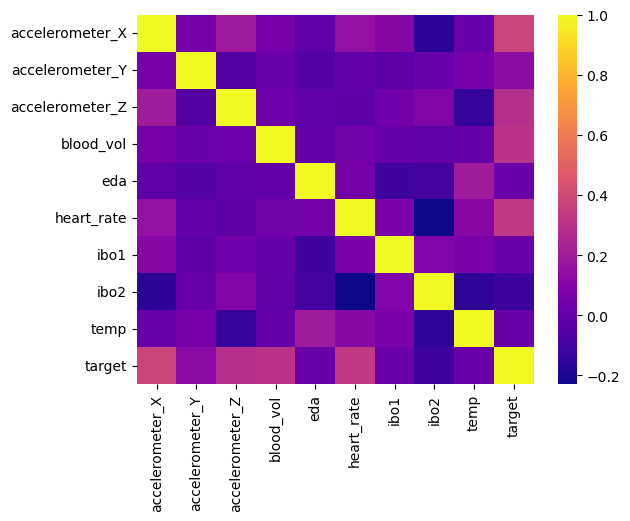

In [20]:
#This code visualizes the correlation matrix computed in the previous step using the heatmap function from the seaborn library
#The cmap argument specifies the color map to use for the heatmap, in this case 'plasma', which ranges from purple to yellow

sns.heatmap(corr_metric, cmap='plasma')
plt.show()

In [21]:
#This code simply assigns the downsampled DataFrame df_after_downsampling to a new variable named final. The new variable 
#final now references the downsampled DataFrame with the target variable balanced between the two classes. 
#This code assigns the value of the "df_after_downsampling" dataframe to the variable "final".

final = df_after_downsampling

In [22]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453056 entries, 0 to 453055
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  453056 non-null  float64
 1   accelerometer_Y  453056 non-null  float64
 2   accelerometer_Z  453056 non-null  float64
 3   blood_vol        453056 non-null  float64
 4   eda              453056 non-null  float64
 5   heart_rate       453056 non-null  float64
 6   ibo1             453056 non-null  float64
 7   ibo2             453056 non-null  float64
 8   temp             453056 non-null  float64
 9   target           453056 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 34.6 MB


In [23]:
#This code loads data into a pandas dataframe, splits it into training and testing sets, and trains a logistic regression 
#model to predict the target variable. The model's accuracy is evaluated using the accuracy score.

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data into a pandas dataframe


# Split the data into features and target variable
data = final
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7779764269633161


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#This code imports the classification_report function from sklearn.metrics, which is used to generate a report that 
#displays the precision, recall, F1 score, and support for each class in the model's predictions on the test set
#The report helps evaluate the model's performance.

from sklearn.metrics import classification_report

# Print classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78     45353
           1       0.77      0.79      0.78     45259

    accuracy                           0.78     90612
   macro avg       0.78      0.78      0.78     90612
weighted avg       0.78      0.78      0.78     90612

